Primero describir el dataset (que features tiene y cual es el output, que tipo de variables son binarias, etc) básicamente las diapos de hoy

In [2]:
#Do pip install ucimlrepo

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
online_shoppers_purchasing_intention_dataset = fetch_ucirepo(id=468) 
  
# data (as pandas dataframes) 
X = online_shoppers_purchasing_intention_dataset.data.features 
y = online_shoppers_purchasing_intention_dataset.data.targets 
  
# variable information 
print(online_shoppers_purchasing_intention_dataset.variables) 


                       name     role         type demographic description  \
0            Administrative  Feature      Integer        None        None   
1   Administrative_Duration  Feature      Integer        None        None   
2             Informational  Feature      Integer        None        None   
3    Informational_Duration  Feature      Integer        None        None   
4            ProductRelated  Feature      Integer        None        None   
5   ProductRelated_Duration  Feature   Continuous        None        None   
6               BounceRates  Feature   Continuous        None        None   
7                 ExitRates  Feature   Continuous        None        None   
8                PageValues  Feature      Integer        None        None   
9                SpecialDay  Feature      Integer        None        None   
10                    Month  Feature  Categorical        None        None   
11         OperatingSystems  Feature      Integer        None        None   

In [3]:
import pandas as pd
from IPython.core.display import display, HTML
import matplotlib.pyplot as plt
import os

%reload_ext autoreload
%autoreload 1

pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 100)
pd.set_option('display.max_colwidth', 100)

display(HTML("<style>.container { width:100% !important; }</style>"))
import warnings
warnings.filterwarnings('ignore')

C:\Users\lkcep\AppData\Local\Temp\ipykernel_3996\1958095170.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


## The dataset consists of 10 numerical and 8 categorical attributes.

### Numerical Attributes:

Page Categories and Duration: Six attributes ('Administrative', 'Administrative Duration', 'Informational', 'Informational Duration', 'Product Related', and 'Product Related Duration') quantify the count and duration of visits to different types of pages within a session, based on URL analysis.

Google Analytics Metrics: Three attributes ('Bounce Rate', 'Exit Rate', and 'Page Value') are metrics derived from Google Analytics. 'Bounce Rate' is the percentage of single-page sessions, 'Exit Rate' is the percentage of last-page views in sessions, and 'Page Value' is the average value of a page that users visited before completing a transaction.
Special Day: This feature indicates the proximity of a visit to specific significant days (like Mother's Day or Valentine's Day), affecting the likelihood of transactions.
Categorical Attributes:

These include the operating system, browser, region, traffic type, type of visitor (new or returning), a Boolean for weekend visits, and the month of the visit.

### Categorical Attributes:

These include the operating system, browser, region, traffic type, type of visitor (new or returning), a Boolean for weekend visits, and the month of the visit.

In [5]:
data_path = "online_shoppers_intention.csv"
df = pd.read_csv(data_path)
display(
    df.shape,
    df.head()
)

(12330, 18)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [6]:
features = df.columns.tolist()


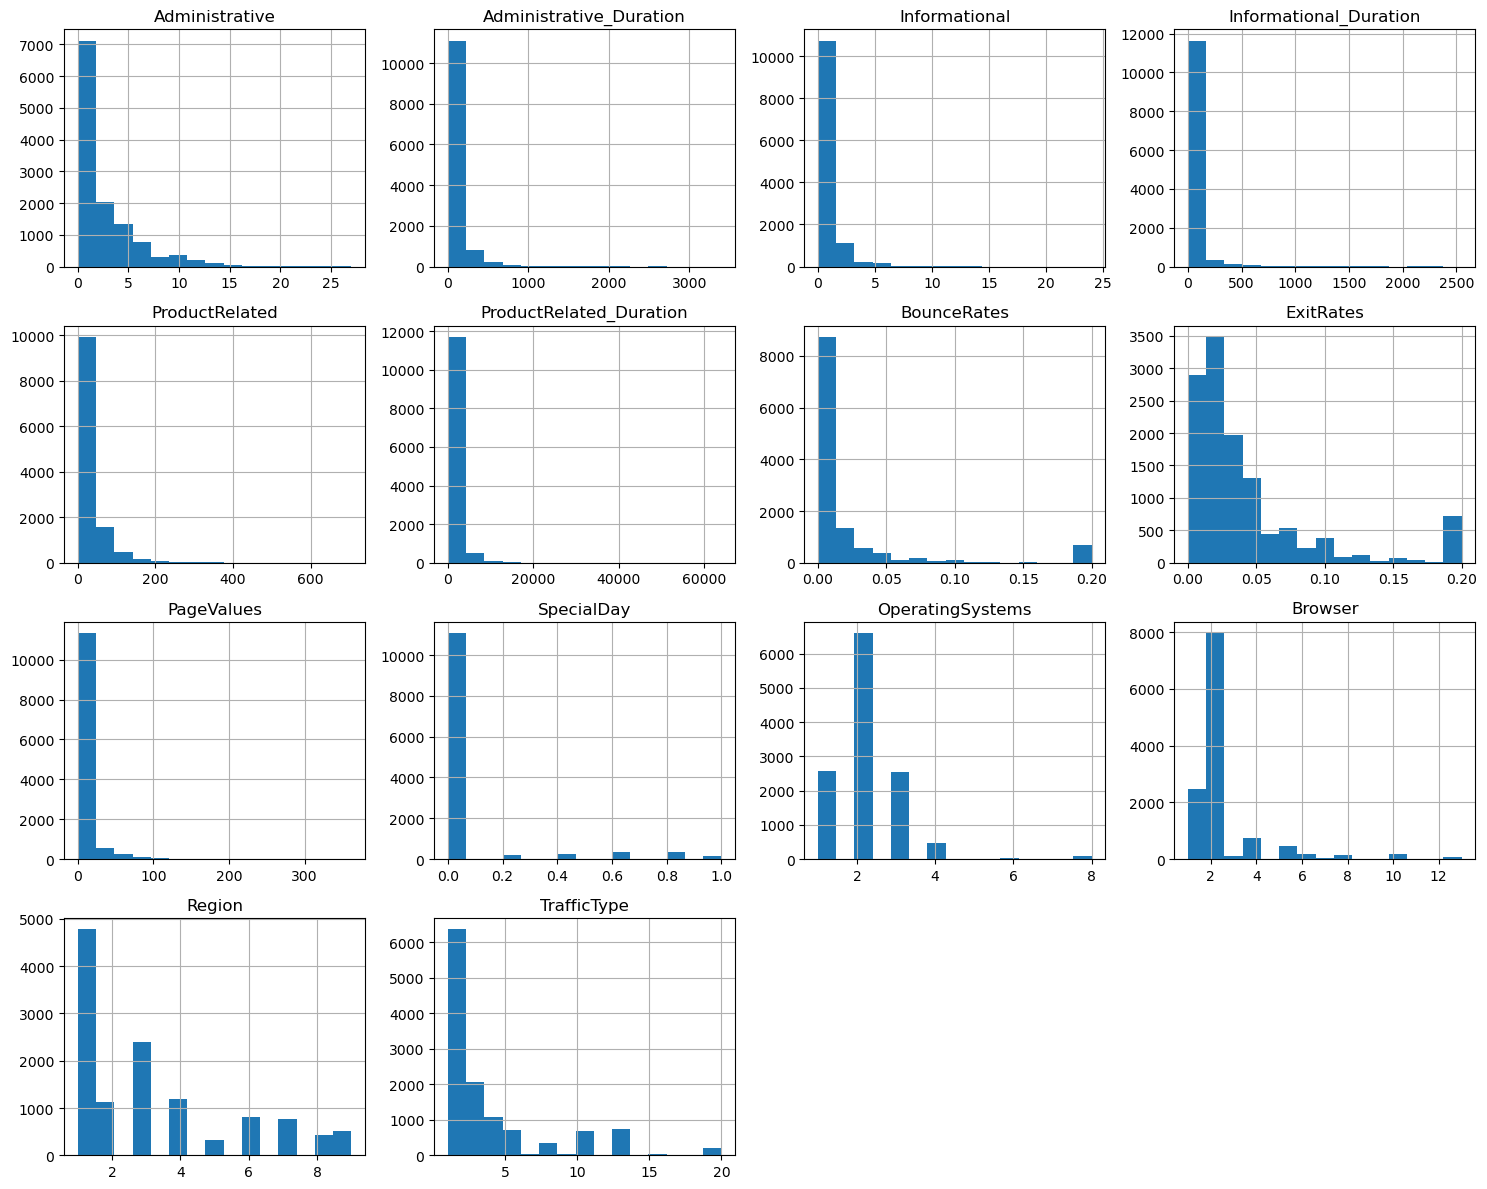

In [12]:
import matplotlib.pyplot as plt

numerical_columns = df.select_dtypes(include=['number']).columns

n_cols = 4
n_rows = (len(numerical_columns) + 3) // 4  

df[numerical_columns].hist(bins=15, figsize=(15, n_rows * 3), layout=(n_rows, n_cols))
plt.tight_layout()
plt.show()



In [13]:
missing_values = df.isnull().sum()
print(missing_values)

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [16]:
summary_statistics = df.describe()
modes = df.mode().loc[0]
print(modes)


Administrative                             0
Administrative_Duration                  0.0
Informational                              0
Informational_Duration                   0.0
ProductRelated                             1
ProductRelated_Duration                  0.0
BounceRates                              0.0
ExitRates                                0.2
PageValues                               0.0
SpecialDay                               0.0
Month                                    May
OperatingSystems                           2
Browser                                    2
Region                                     1
TrafficType                                2
VisitorType                Returning_Visitor
Weekend                                False
Revenue                                False
Name: 0, dtype: object


In [22]:
month_values = df['Month'].value_counts()

visitortype_values = df['VisitorType'].value_counts()

print("Frequency of each category in 'Month':\n", month_values)
print("\nFrequency of each category in 'VisitorType':\n", visitortype_values)

Frequency of each category in 'Month':
 Month
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: count, dtype: int64

Frequency of each category in 'VisitorType':
 VisitorType
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: count, dtype: int64
